##                                        IMAGE CLASSIFICATION OF THE CGR USING MACHINE LEARNING MODEL
##### TEAM 13
______________________________________________________________________________________________________________________________________________

#### PRE PROCESSING DATA FOR MACHINE LEARNING 

In [1]:
# IMPORTING PKG
import numpy as np               # Linear algebra
import pandas as pd              # Data processing, CSV file I/O (e.g. pd.read_csv)
import os                        # The *os* and *os. path* modules include many functions to interact with the file system.
import matplotlib.pyplot as plt  # Plotting 
%matplotlib inline              
import cv2                       # Image reading and processing 
import warnings                  # supress warning 
warnings.filterwarnings('ignore')

In [2]:
DATADIR = "C:\\Users\\jaish\\Documents\\SEM4\\IBS 4\\end sem pro\\dataset\\4mer"  # Specifying the data set directory 
CATEGORIES = ["DICOT","FERNS","GRAMINAE"]                                         # Categories to be classified 
IMG_SIZE=100                                                                      # Specifying Image size


In [3]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        #concatenates various path components with exactly one directory separator ('/')
        path=os.path.join(DATADIR, category)
        # Encoding label as its Index number 
        class_num=CATEGORIES.index(category)
        # Iterating through every img in the specified directory
        for img in os.listdir(path):
            try:
                #reading the image in the specified directory
                img_array=cv2.imread(os.path.join(path,img))
                # Re-sizing the original img to specified img size
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                # appending the converted data in training data along with the index 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()      

In [4]:
#printing the first element in the list
training_data[1]

[array([[[ 60,  60,  60],
         [ 60,  60,  60],
         [ 60,  60,  60],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[ 60,  60,  60],
         [ 60,  60,  60],
         [ 60,  60,  60],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[ 60,  60,  60],
         [ 60,  60,  60],
         [ 60,  60,  60],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        ...,
 
        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [247, 247, 247],
         [247, 247, 247],
         [247, 247, 247]],
 
        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [247, 247, 247],
         [247, 247, 247],
         [247, 247, 247]],
 
        [[242, 242, 242],
         [242, 242, 242],
         [242, 242, 242],
         ...,
         [247, 247, 247],
  

In [5]:
# Number of images
# Basically number of rows in the data 
lenofimage = len(training_data)
print(lenofimage)

90


In [6]:
X=[]
y=[]
for categories, label in training_data:
    X.append(categories)
    y.append(label)
# flattening the three dim array to single dim    
X= np.array(X).reshape(lenofimage,-1)
# Normalizing 
X = X/255.0

In [7]:
""" For each img there will be three dim and size of each dim is 100 x 100
    therefore the total number of feachers = 3*100*100 that is 30,000"""
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,...,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314,0.784314
1,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,...,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627
2,0.325490,0.325490,0.325490,0.498039,0.498039,0.498039,0.498039,0.498039,0.498039,0.498039,...,0.929412,0.929412,0.929412,0.929412,0.929412,0.929412,0.929412,0.929412,0.929412,0.929412
3,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,...,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627,0.968627
4,0.803922,0.803922,0.803922,0.803922,0.803922,0.803922,0.803922,0.803922,0.803922,0.803922,...,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255,0.937255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.113725,0.113725,0.113725,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
86,0.039216,0.039216,0.039216,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.901961,0.901961,0.901961,0.901961,0.901961,0.901961,0.901961,0.901961,0.901961,0.901961
87,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,...,0.713725,0.713725,0.713725,0.713725,0.713725,0.713725,0.713725,0.713725,0.713725,0.713725
88,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# class labels 
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
85,2
86,2
87,2
88,2


In [9]:
y=np.array(y)
print(y.shape)

(90,)


In [10]:
from sklearn.model_selection import train_test_split
# split data into training and testing datasets
# training data = 80%
# testing data = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=138)

### MACHINE LEARNING MODELS

**Random Forest Classifier**  
______________________________________________________________________________________________________________________________________________
  •	Constructs multiple decision tree during training phase  
  •	Decision of majority of the tree is considered as the final decision
  
**Bayes’ Theorem**
______________________________________________________________________________________________________________________________________________
Bayes’ Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge.
Bayes’ Theorem is stated as:

**P(class|data) = (P(data|class) * P(class)) / P(data)**

Where P(class|data) is the probability of class given the provided data.

**Gaussian Naive Bayes**
______________________________________________________________________________________________________________________________________________
  • Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian distribution.
The likelihood of the features is assumed to be Gaussian, hence, conditional probability is given by:

<center><h3>$P(X_{i}|Y)=\frac{1}{\sqrt{2\pi \sigma _{Y}^{2}}}exp(-\frac{(X_{i}-\mu _{Y})^{2}}{2\sigma _{Y}^{2}})$</h3></center><br>

**SVM Linear**
______________________________________________________________________________________________________________________________________________
SVM or Support Vector Machine is a linear model for classification and regression problems.

  •Linear SVM: Linear SVM is used for linearly separable data, which means if a dataset can be classified into two or more classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

In [11]:
import warnings                  # supress warning 
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt
# define scoring method
scoring = 'accuracy'

# Define models to train
names = ["Random Forest","Naive Bayes" ,"SVM Linear"]
classifiers = [
     # max_depth = depth of a tree 
     # n_estimators = number of trees in the the forest
     RandomForestClassifier(max_depth=1000, n_estimators=50,random_state=43),
     GaussianNB(),
     # kernel = linear 
     # gamma = Gamma decides that how much curvature we want in a decision boundary.
     SVC(kernel = 'linear', gamma= 0.01)
]
#purpose of zip() is to map the similar index of multiple containers so that they can be used just using as single entity.
models = zip(names, classifiers)
acc_score=[]
Accuracy = []
precision = []
recall = []
F1score = []
for name, classifier in models:
    #fit function in ML, is used for training of model using data examples.
    #Fit function adjusts weights according to data values so that better accuracy can be achieved.
    classifier.fit(X_train, y_train)
    #predict() function enables us to predict the labels of the data values on the basis of the trained model.
    predicted = classifier.predict(X_test)
    print(name)
    # examining the output 
    Report = classification_report(y_test, predicted, output_dict=True)
    Report_ = classification_report(y_test, predicted)
    #skplt.metrics.plot_confusion_matrix(y_test,predicted )
    acc_score.append(accuracy_score(y_test, predicted))
    print("Accuracy Score:\n",accuracy_score(y_test, predicted)) #tp+tn/tp+tn+fp+fn
    Accuracy.append(Report['accuracy'])
    precision.append(Report['macro avg']['precision']) 
    recall.append(Report['macro avg']['recall'])
    F1score.append(Report['macro avg']['f1-score'])
    print("Classification report:\n",Report_) #The classification report visualizer displays the precision, recall, F1, and support scores for the model. 
    print("Confusion Matrix:\n",confusion_matrix(y_test,predicted)) #assess the performance of the classifier (dim=true class x prediction class)
    print()

Random Forest
Accuracy Score:
 0.8333333333333334
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.71      0.83      0.77         6
           2       0.75      0.60      0.67         5

    accuracy                           0.83        18
   macro avg       0.82      0.81      0.81        18
weighted avg       0.84      0.83      0.83        18

Confusion Matrix:
 [[7 0 0]
 [0 5 1]
 [0 2 3]]

Naive Bayes
Accuracy Score:
 0.7222222222222222
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.60      1.00      0.75         6
           2       0.67      0.40      0.50         5

    accuracy                           0.72        18
   macro avg       0.76      0.70      0.69        18
weighted avg       0.77      0.72      0.71        18

Confusion Matrix:
 [[5 1 1]
 [0 6 0]
 [0 3 2

### VISUALIZATION

In [12]:
#importing pkg
from sklearn.decomposition import PCA                  
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
from mlxtend.plotting import plot_decision_regions
from matplotlib import pyplot as plt

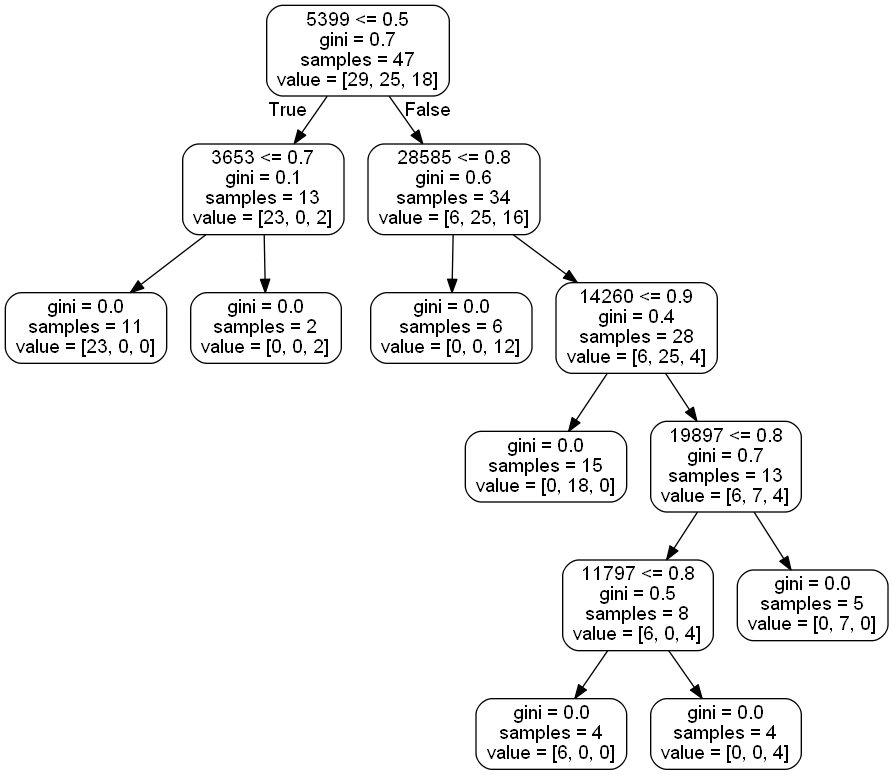

In [13]:
rf = RandomForestClassifier(max_depth=1000, random_state=42,n_estimators=50)
#fit(X, y[, sample_weight]) - Build a forest of trees from the training set (X, y) 
rf.fit(X_train, y_train)
# Pull out one tree from the forest
tree = rf.estimators_[5]
fn= range(0,30000)
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree1.dot', feature_names =fn , rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree1.dot')
# Write graph to a png file
graph.write_png('tree1.png')
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')

**Principal component analysis (PCA).** 

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 

Text(0.5, 1.0, 'Random Forest')

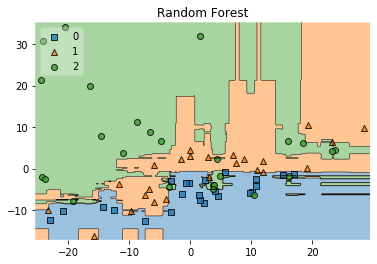

In [14]:
# Random Forest Classifier
rf = RandomForestClassifier(max_depth=1000, n_estimators=50,random_state=43)
rf_ = RandomForestClassifier(max_depth=1000, n_estimators=50,random_state=43)
rf_.fit(X_train,y_train)
pca = PCA(n_components = 2)#PCA Projection to 2D
X_train2 = pca.fit_transform(X_train)
rf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=rf, legend=2)
plt.title('Random Forest')

Text(0.5, 1.0, 'SVM')

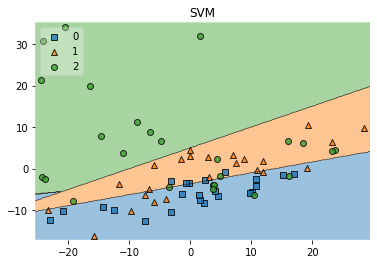

In [15]:
# SVM Classifier 
svc =  SVC(kernel='linear', gamma= 0.01)
svc_ =  SVC(kernel='linear', gamma= 0.01)
svc_.fit(X_train,y_train)
pca = PCA(n_components = 2)#PCA Projection to 2D
X_train2 = pca.fit_transform(X_train)
svc.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=svc, legend=2)
plt.title('SVM')

Text(0.5, 1.0, 'Naive Bayes')

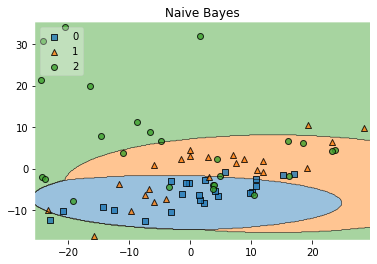

In [16]:
#Gaussian Naive Bayes
NB = GaussianNB()
NB_ = GaussianNB()
NB_.fit(X_train,y_train)
pca = PCA(n_components = 2)#PCA Projection to 2D
X_train2 = pca.fit_transform(X_train)
NB.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=NB, legend=2)
plt.title('Naive Bayes')

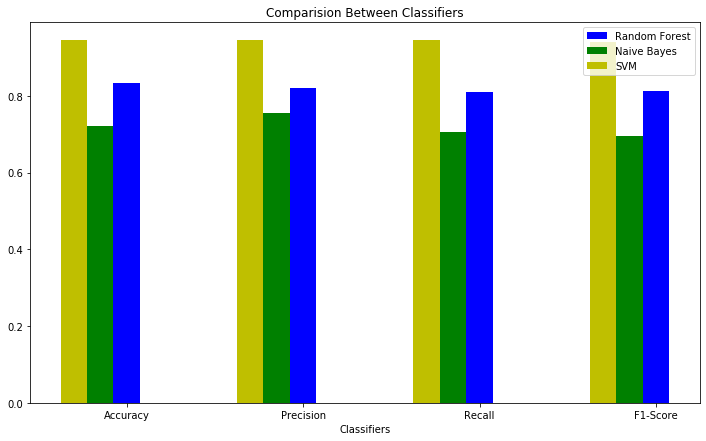

<Figure size 720x720 with 0 Axes>

In [17]:
a=np.arange(4)
w = 0.15
fig,ax=plt.subplots(figsize=(12,7),edgecolor='k')

p1=ax.bar(a,[Accuracy[0],precision[0],recall[0],F1score[0],],w,color='b')
p2=ax.bar(a-w,[Accuracy[1],precision[1],recall[1],F1score[1]],w,color='g')
p3=ax.bar(a-2*w,[Accuracy[2],precision[2],recall[2],F1score[2]],w,color='y')
ax.set_xticks(a)
ax.set_xticklabels(('Accuracy','Precision','Recall','F1-Score'))
ax.set_title('Comparision Between Classifiers')

ax.legend((p1[0],p2[0],p3[0]),('Random Forest','Naive Bayes','SVM'))
plt.xlabel('Classifiers')
plt.figure(figsize=(10,10))
plt.show()

In [18]:
Accuracy

[0.8333333333333334, 0.7222222222222222, 0.9444444444444444]

In [19]:
recall

[0.8111111111111112, 0.7047619047619048, 0.9444444444444445]

In [20]:
precision

[0.8214285714285715, 0.7555555555555555, 0.9444444444444445]

In [21]:
from tkinter import *
from tkinter.ttk import *
from tkinter.filedialog import askopenfile 
import time
from tkinter import *
from tkinter import ttk
import tkinter as tk
import cv2
# loading Python Imaging Library
from PIL import ImageTk, Image
import tkinter.messagebox
# To get the dialog box to open when required 
from tkinter import filedialog

# Create a windoe
def openfilename():
    # open file dialog box to select image
    # The dialogue box has a title "Open"
    filename = filedialog.askopenfilename(title ='"pen')
    return filename
def uploadFiles():
    pb1 = Progressbar(
        gui, 
        orient=HORIZONTAL, 
        length=300, 
        mode='determinate',
        )
    pb1.pack(anchor = W)
    pb1.place(x=290,y=75)
    for i in range(10):
        gui.update_idletasks()
        pb1['value'] += 10
        time.sleep(0.15)
    pb1.destroy()
    Label(gui, text='Image loaded !', foreground='green' ,bg ="honeydew").place(x=350,y=75)
    #Label(gui, text='Image loaded !').place(x=350,y=75)


path = []
def open_img():
    # Select the Imagename  from a folder 
    x = openfilename()
    path.append(x)
    print(path)
    IMG_SIZE=100
    # opens the image
    uploadFiles()
    img = Image.open(x)

    # resize the image and apply a high-quality down sampling filter
    img = img.resize((200, 200), Image.ANTIALIAS)
    # PhotoImage class is used to add image to widgets, icons etc
    img = ImageTk.PhotoImage(img)
    # create a label
    panel = Label(gui, image = img)
      
    # set the image as img 
    panel.image = img
    panel.place(x=180,y=120)
    

gui = Tk()
# Set Title as Image Loader
gui.title(" CGR FOR BIO SEQUENCE CLASSIFICATION")
# Set the resolution of window
gui.geometry('600x600')  
gui.configure(bg='honeydew')
lbl = Label(gui,text = "IMAGE CLASSIFICATION OF THE CGR USING MACHINE LEARNING MODEL",font=("Helvetica", 10),background='darkseagreen')
lbl.pack(anchor = W  )
lbl.place(x=80,y=10)

# Create a button and place it into the window using grid layout
load_label = Label(gui,text = "Load the CGR image ",font= 7,background ="honeydew")
load_label.pack(anchor = W  )
load_label.place(x=30,y=75)
btn = Button(gui, text ='Load', command = open_img,bg="lightslategrey",fg = 'white',height = 1, width = 6)
#btn = Button(gui, text ='Load', command = open_img)

btn.pack() 
btn.place(x=225,y=73)
# Allow Window to be resizable
gui.resizable(width = True, height = True)

# Combobox creation
n = tk.StringVar()
Algorithm = ttk.Combobox(gui, width = 27, textvariable = n)
  
# Adding combobox drop down list
Algorithm['values'] = ('SVM', 
                          'Random Forest',
                          'Naive Bayes')
Label(gui, text = "Algorithms  ",background='darkseagreen').place(x=150,y=380)
Algorithm.place(x=223,y=380)
Algorithm.current()

# Create a messagebox showinfo
def popupmsg(msg,index):
     
    output ="The given CGR image belongs to "
    if(msg == 0):
        output = output+"Dicot"
    if(msg == 1):
        output = output+"Ferns"
    if(msg == 2):
        output = output+"Graminae"
        
    popup = tk.Tk()
    popup.geometry('300x180')
    popup.configure(bg = 'aliceblue')
    popup.wm_title("Result ")
    #Label(popup, text = "Evaluation metrics  ").place(x=0,y=40)
    Label(popup, text = "Evaluation metrics  ",bg='lightblue').place(x=100,y=40)

    Label(popup, bg = 'aliceblue',text = "Accuracy  :  " + str(round(Accuracy[index],2))).place(x=0,y=60)
    Label(popup, bg = 'aliceblue',text = "Precision :  " + str(round(precision[index],2))).place(x=0,y=80)
    Label(popup, bg = 'aliceblue',text = "Recall    :  " + str(round(recall[index],2))).place(x=0,y=100)
    Label(popup, bg = 'aliceblue',text = "F1_Score  :  " + str(round(F1score[index],2))).place(x=0,y=120)
    label = Label(popup, text=output, bg = 'darkblue',fg = 'white',font=("Helvetica", 12))
    label.pack(side="top", fill="x", pady=10)
    B1 = ttk.Button(popup, text="Okay", command = popup.destroy)
    B1.pack()
    B1.place(x=120,y=140)
    popup.mainloop()

print(path)
index = -1
def onClick():
    IMG_SIZE = 100
    
    img_array=cv2.imread(path[0])
    new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    X= np.array(new_array).reshape(1,-1)
    print(X)
    new_array = X/255.0
    if(Algorithm.get() == "SVM"):
        y2 = svc_.predict(new_array)
        index = 2
    if(Algorithm.get() == "Random Forest"):
        y2 = rf_.predict(new_array)
        index = 0 
    if(Algorithm.get() == "Naive Bayes"):
        y2 = NB_.predict(new_array)
        index = 1
    print(y2)
    popupmsg(y2,index)
# Create a Button
button = Button(gui, text="Predict", command=onClick, height=2, width=20)
#button = Button(gui, text="   Predict  ", command=onClick)

# Set the position of button on the top of window.
button.pack()
button.place(x=223,y=500)


"""    
Label(gui, text = "Evaluation metrics  ").place(x=425,y=350)
#Label(gui, text = "Evaluation metrics  ",bg='darkseagreen').place(x=425,y=350)

Label(gui, text = "Accuracy  :  " + str(Accuracy[index])).place(x=375,y=375)
Label(gui, text = "Precision :  " + str(precision[index])).place(x=375,y=400)
Label(gui, text = "Recall    :  " + str(recall[index])).place(x=375,y=425)
Label(gui, text = "F1_Score  :  " + str(F1score[index])).place(x=375,y=450)  
"""
gui.mainloop()

[]


GUI SAMPLE 
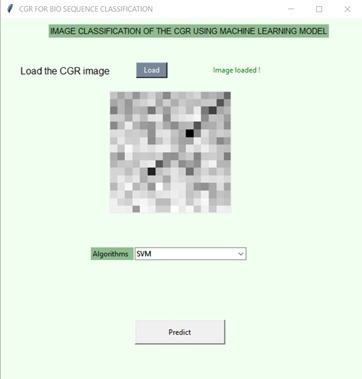

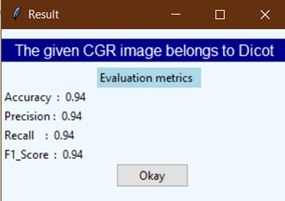

In [24]:
#!pip install scikit-plot

In [ ]:
from tkinter import *
from tkinter.ttk import *
from tkinter import ttk
from tkinter.filedialog import askopenfile 
import time
import tkinter as tk
import cv2
# loading Python Imaging Library
from PIL import ImageTk, Image
import tkinter.messagebox
# To get the dialog box to open when required 
from tkinter import filedialog